In [102]:
import pandas as pd
import numpy as np
from datetime import datetime
date_format = "%Y-%m-%d"

In [103]:
fall = pd.read_csv('Datasets/fall.csv')
fall = fall[['datetime', 'conditions']]


In [104]:
fall.head()

,datetime,conditions
0,2000-10-01,Rain
1,2000-10-02,Rain
2,2000-10-03,Rain
3,2000-10-04,Rain
4,2000-10-05,Rain


In [105]:
classifier = {'Overcast':'overcast', 'Partially cloudy':'partially_cloudy', 'Clear':'clear', 'Rain, Partially cloudy':'rain_partially_cloudy', 'Rain':'rain', 'Rain, Overcast':'rain_overcast'}

fall['condition'] = fall['conditions'].map(classifier)

In [106]:
fall.head()

,datetime,conditions,condition
0,2000-10-01,Rain,rain
1,2000-10-02,Rain,rain
2,2000-10-03,Rain,rain
3,2000-10-04,Rain,rain
4,2000-10-05,Rain,NaN


In [107]:
fall = fall[['datetime', 'condition']]

In [108]:

fall.head()

,datetime,condition
0,2000-10-01,rain
1,2000-10-02,rain
2,2000-10-03,rain
3,2000-10-04,rain
4,2000-10-05,NaN


In [109]:
train_start_date = '2002-01-01'
train_end_date = '2017-12-31'
fall_train = fall.loc[fall['datetime'].between(train_start_date, train_end_date)]
fall_train = fall_train.reset_index()

test_start_date = '2018-01-01'
test_end_date = '2021-12-31'
fall_test = fall.loc[fall['datetime'].between(test_start_date, test_end_date)]
fall_test = fall_test.reset_index()

Calculate proportions of conditions & Create transition matrix

In [110]:
# Initialize count variables

# 0: 'clear' - C
# 1: 'partially_cloudy' - PC
# 2: 'overcast' - OV
# 3: 'rain' - R
# 4: 'rain_partially_cloudy' - RPC
# 5: 'rain_overcast' - ROV

C_after_C_count = 0.0
PC_after_C_count = 0.0
OV_after_C_count = 0.0
R_after_C_count = 0.0
RPC_after_C_count = 0.0
ROV_after_C_count = 0.0

C_after_PC_count = 0.0
PC_after_PC_count = 0.0
OV_after_PC_count = 0.0
R_after_PC_count = 0.0
RPC_after_PC_count = 0.0
ROV_after_PC_count = 0.0

C_after_OV_count = 0.0
PC_after_OV_count = 0.0
OV_after_OV_count = 0.0
R_after_OV_count = 0.0
RPC_after_OV_count = 0.0
ROV_after_OV_count = 0.0

C_after_R_count = 0.0
PC_after_R_count = 0.0
OV_after_R_count = 0.0
R_after_R_count = 0.0
RPC_after_R_count = 0.0
ROV_after_R_count = 0.0

C_after_RPC_count = 0.0
PC_after_RPC_count = 0.0
OV_after_RPC_count = 0.0
R_after_RPC_count = 0.0
RPC_after_RPC_count = 0.0
ROV_after_RPC_count = 0.0

C_after_ROV_count = 0.0
PC_after_ROV_count = 0.0
OV_after_ROV_count = 0.0
R_after_ROV_count = 0.0
RPC_after_ROV_count = 0.0
ROV_after_ROV_count = 0.0

In [111]:
fall_train

,index,datetime,condition
0,184,2002-10-01,partially_cloudy
1,185,2002-10-02,clear
2,186,2002-10-03,clear
3,187,2002-10-04,clear
4,188,2002-10-05,clear
...,...,...,...
1467,1651,2017-12-27,clear
1468,1652,2017-12-28,clear
1469,1653,2017-12-29,clear
1470,1654,2017-12-30,partially_cloudy


In [112]:
fall_train['condition_shift'] = fall_train['condition'].shift(-1)

for i in range(len(fall_train)):
    # Current 'clear'
    if fall_train.loc[i, 'condition'] == 'clear' and fall_train.loc[i, 'condition_shift'] == 'clear':
        C_after_C_count += 1
    elif fall_train.loc[i, 'condition'] == 'partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'clear':
        PC_after_C_count += 1
    elif fall_train.loc[i, 'condition'] == 'overcast' and fall_train.loc[i, 'condition_shift'] == 'clear':
        OV_after_C_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain' and fall_train.loc[i, 'condition_shift'] == 'clear':
        R_after_C_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'clear':
        RPC_after_C_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_overcast' and fall_train.loc[i, 'condition_shift'] == 'clear':
        ROV_after_C_count += 1
    # Current 'partially_cloudy'
    elif fall_train.loc[i, 'condition'] == 'clear' and fall_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        C_after_PC_count += 1
    elif fall_train.loc[i, 'condition'] == 'partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        PC_after_PC_count += 1
    elif fall_train.loc[i, 'condition'] == 'overcast' and fall_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        OV_after_PC_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain' and fall_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        R_after_PC_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        RPC_after_PC_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_overcast' and fall_train.loc[i, 'condition_shift'] == 'partially_cloudy':
        ROV_after_PC_count += 1
    # Current 'overcast'
    elif fall_train.loc[i, 'condition'] == 'clear' and fall_train.loc[i, 'condition_shift'] == 'overcast':
        C_after_OV_count += 1
    elif fall_train.loc[i, 'condition'] == 'partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'overcast':
        PC_after_OV_count += 1
    elif fall_train.loc[i, 'condition'] == 'overcast' and fall_train.loc[i, 'condition_shift'] == 'overcast':
        OV_after_OV_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain' and fall_train.loc[i, 'condition_shift'] == 'overcast':
        R_after_OV_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'overcast':
        RPC_after_OV_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_overcast' and fall_train.loc[i, 'condition_shift'] == 'overcast':
        ROV_after_OV_count += 1
    # Current 'rain'
    elif fall_train.loc[i, 'condition'] == 'clear' and fall_train.loc[i, 'condition_shift'] == 'rain':
        C_after_R_count += 1
    elif fall_train.loc[i, 'condition'] == 'partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'rain':
        PC_after_R_count += 1
    elif fall_train.loc[i, 'condition'] == 'overcast' and fall_train.loc[i, 'condition_shift'] == 'rain':
        OV_after_R_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain' and fall_train.loc[i, 'condition_shift'] == 'rain':
        R_after_R_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'rain':
        RPC_after_R_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_overcast' and fall_train.loc[i, 'condition_shift'] == 'rain':
        ROV_after_R_count += 1
    # Current 'rain_partially_cloudy'
    elif fall_train.loc[i, 'condition'] == 'clear' and fall_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        C_after_RPC_count += 1
    elif fall_train.loc[i, 'condition'] == 'partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        PC_after_RPC_count += 1
    elif fall_train.loc[i, 'condition'] == 'overcast' and fall_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        OV_after_RPC_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain' and fall_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        R_after_RPC_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        RPC_after_RPC_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_overcast' and fall_train.loc[i, 'condition_shift'] == 'rain_partially_cloudy':
        ROV_after_RPC_count += 1
    # Current 'rain_overcast'
    elif fall_train.loc[i, 'condition'] == 'clear' and fall_train.loc[i, 'condition_shift'] == 'rain_overcast':
        C_after_ROV_count += 1
    elif fall_train.loc[i, 'condition'] == 'partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'rain_overcast':
        PC_after_ROV_count += 1
    elif fall_train.loc[i, 'condition'] == 'overcast' and fall_train.loc[i, 'condition_shift'] == 'rain_overcast':
        OV_after_ROV_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain' and fall_train.loc[i, 'condition_shift'] == 'rain_overcast':
        R_after_ROV_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_partially_cloudy' and fall_train.loc[i, 'condition_shift'] == 'rain_overcast':
        RPC_after_ROV_count += 1
    elif fall_train.loc[i, 'condition'] == 'rain_overcast' and fall_train.loc[i, 'condition_shift'] == 'rain_overcast':
        ROV_after_ROV_count += 1

In [113]:
current_C_total = C_after_C_count + PC_after_C_count + OV_after_C_count + R_after_C_count + RPC_after_C_count + ROV_after_C_count
current_PC_total = C_after_PC_count + PC_after_PC_count + OV_after_PC_count + R_after_PC_count + RPC_after_PC_count + ROV_after_PC_count
current_OV_total = C_after_OV_count + PC_after_OV_count + OV_after_OV_count + R_after_OV_count + RPC_after_OV_count + ROV_after_OV_count
current_R_total =C_after_R_count + PC_after_R_count + OV_after_R_count + R_after_R_count + RPC_after_R_count + ROV_after_R_count
current_RPC_total = C_after_RPC_count + PC_after_RPC_count + OV_after_RPC_count + R_after_RPC_count + RPC_after_RPC_count + ROV_after_RPC_count
current_ROV_total = C_after_ROV_count + PC_after_ROV_count + OV_after_ROV_count + R_after_ROV_count + RPC_after_ROV_count + ROV_after_ROV_count

In [114]:
C_after_C_prob = C_after_C_count / current_C_total
PC_after_C_prob = PC_after_C_count / current_C_total
OV_after_C_prob = OV_after_C_count / current_C_total
R_after_C_prob = R_after_C_count / current_C_total
RPC_after_C_prob = RPC_after_C_count / current_C_total
ROV_after_C_prob = ROV_after_C_count / current_C_total

C_after_PC_prob = C_after_PC_count / current_PC_total
PC_after_PC_prob = PC_after_PC_count / current_PC_total
OV_after_PC_prob = OV_after_PC_count / current_PC_total
R_after_PC_prob = R_after_PC_count / current_PC_total
RPC_after_PC_prob = RPC_after_PC_count / current_PC_total
ROV_after_PC_prob = ROV_after_PC_count / current_PC_total

C_after_OV_prob = C_after_OV_count / current_OV_total
PC_after_OV_prob = PC_after_OV_count / current_OV_total
OV_after_OV_prob = OV_after_OV_count / current_OV_total
R_after_OV_prob = R_after_OV_count / current_OV_total
RPC_after_OV_prob = RPC_after_OV_count / current_OV_total
ROV_after_OV_prob = ROV_after_OV_count / current_OV_total

C_after_R_prob = C_after_R_count / current_R_total
PC_after_R_prob = PC_after_R_count / current_R_total
OV_after_R_prob = OV_after_R_count / current_R_total
R_after_R_prob = R_after_R_count / current_R_total
RPC_after_R_prob = RPC_after_R_count / current_R_total
ROV_after_R_prob = ROV_after_R_count / current_R_total

C_after_RPC_prob = C_after_RPC_count / current_RPC_total
PC_after_RPC_prob = PC_after_RPC_count / current_RPC_total
OV_after_RPC_prob = OV_after_RPC_count / current_RPC_total
R_after_RPC_prob = R_after_RPC_count / current_RPC_total
RPC_after_RPC_prob = RPC_after_RPC_count / current_RPC_total
ROV_after_RPC_prob = ROV_after_RPC_count / current_RPC_total

C_after_ROV_prob = C_after_ROV_count / current_ROV_total
PC_after_ROV_prob = PC_after_ROV_count / current_ROV_total
OV_after_ROV_prob = OV_after_ROV_count / current_ROV_total
R_after_ROV_prob = R_after_ROV_count / current_ROV_total
RPC_after_ROV_prob = RPC_after_ROV_count / current_ROV_total
ROV_after_ROV_prob = ROV_after_ROV_count / current_ROV_total

In [115]:
# Printing our probabilities for 6x6 transition matrix:
print(C_after_C_prob)
print(PC_after_C_prob)
print(OV_after_C_prob)
print(R_after_C_prob)
print(RPC_after_C_prob)
print(ROV_after_C_prob)

print(C_after_PC_prob)
print(PC_after_PC_prob)
print(OV_after_PC_prob)
print(R_after_PC_prob)
print(RPC_after_PC_prob)
print(ROV_after_PC_prob)

print(C_after_OV_prob)
print(PC_after_OV_prob)
print(OV_after_OV_prob)
print(R_after_OV_prob)
print(RPC_after_OV_prob)
print(ROV_after_OV_prob)

print(C_after_R_prob)
print(PC_after_R_prob)
print(OV_after_R_prob)
print(R_after_R_prob)
print(RPC_after_R_prob)
print(ROV_after_R_prob)

print(C_after_RPC_prob)
print(PC_after_RPC_prob)
print(OV_after_RPC_prob)
print(R_after_RPC_prob)
print(RPC_after_RPC_prob)
print(ROV_after_RPC_prob)

print(C_after_ROV_prob)
print(PC_after_ROV_prob)
print(OV_after_ROV_prob)
print(R_after_ROV_prob)
print(RPC_after_ROV_prob)
print(ROV_after_ROV_prob)

0.7132963988919667
0.13850415512465375
0.0
0.04847645429362881
0.09002770083102493
0.009695290858725761
0.3462532299741602
0.4883720930232558
0.015503875968992248
0.025839793281653745
0.1111111111111111
0.012919896640826873
0.0
0.5882352941176471
0.17647058823529413
0.0
0.17647058823529413
0.058823529411764705
0.2876712328767123
0.2054794520547945
0.0
0.2328767123287671
0.2465753424657534
0.0273972602739726
0.21296296296296297
0.26851851851851855
0.027777777777777776
0.046296296296296294
0.3472222222222222
0.09722222222222222
0.10714285714285714
0.26785714285714285
0.03571428571428571
0.017857142857142856
0.21428571428571427
0.35714285714285715


In [116]:
# Checking that each row in the transition matrix adds up to 1:
print(C_after_C_prob + PC_after_C_prob + OV_after_C_prob + R_after_C_prob + RPC_after_C_prob + ROV_after_C_prob)
print(C_after_PC_prob + PC_after_PC_prob + OV_after_PC_prob + R_after_PC_prob + RPC_after_PC_prob + ROV_after_PC_prob)
print(C_after_OV_prob + PC_after_OV_prob + OV_after_OV_prob + R_after_OV_prob + RPC_after_OV_prob + ROV_after_OV_prob)
print(C_after_R_prob + PC_after_R_prob + OV_after_R_prob + R_after_R_prob + RPC_after_R_prob + ROV_after_R_prob)
print(C_after_RPC_prob + PC_after_RPC_prob + OV_after_RPC_prob + R_after_RPC_prob + RPC_after_RPC_prob + ROV_after_RPC_prob)
print(C_after_ROV_prob + PC_after_ROV_prob + OV_after_ROV_prob + R_after_ROV_prob + RPC_after_ROV_prob + ROV_after_ROV_prob)

1.0
1.0
1.0
1.0
1.0
1.0


In [117]:
# Creating the transition matrix:
transition_matrix = [[C_after_C_prob, PC_after_C_prob, OV_after_C_prob, R_after_C_prob, RPC_after_C_prob, ROV_after_C_prob], 
                    [C_after_PC_prob, PC_after_PC_prob, OV_after_PC_prob, R_after_PC_prob, RPC_after_PC_prob, ROV_after_PC_prob],
                    [C_after_OV_prob, PC_after_OV_prob, OV_after_OV_prob, R_after_OV_prob, RPC_after_OV_prob, ROV_after_OV_prob],
                    [C_after_R_prob, PC_after_R_prob, OV_after_R_prob, R_after_R_prob, RPC_after_R_prob, ROV_after_R_prob],
                    [C_after_RPC_prob, PC_after_RPC_prob, OV_after_RPC_prob, R_after_RPC_prob, RPC_after_RPC_prob, ROV_after_RPC_prob],
                    [C_after_ROV_prob, PC_after_ROV_prob, OV_after_ROV_prob, R_after_ROV_prob, RPC_after_ROV_prob, ROV_after_ROV_prob]]
print(transition_matrix)

[[0.7132963988919667, 0.13850415512465375, 0.0, 0.04847645429362881, 0.09002770083102493, 0.009695290858725761], [0.3462532299741602, 0.4883720930232558, 0.015503875968992248, 0.025839793281653745, 0.1111111111111111, 0.012919896640826873], [0.0, 0.5882352941176471, 0.17647058823529413, 0.0, 0.17647058823529413, 0.058823529411764705], [0.2876712328767123, 0.2054794520547945, 0.0, 0.2328767123287671, 0.2465753424657534, 0.0273972602739726], [0.21296296296296297, 0.26851851851851855, 0.027777777777777776, 0.046296296296296294, 0.3472222222222222, 0.09722222222222222], [0.10714285714285714, 0.26785714285714285, 0.03571428571428571, 0.017857142857142856, 0.21428571428571427, 0.35714285714285715]]


In [118]:

t_array = np.array(transition_matrix)
print(t_array)

[[0.7132964  0.13850416 0.         0.04847645 0.0900277  0.00969529]
 [0.34625323 0.48837209 0.01550388 0.02583979 0.11111111 0.0129199 ]
 [0.         0.58823529 0.17647059 0.         0.17647059 0.05882353]
 [0.28767123 0.20547945 0.         0.23287671 0.24657534 0.02739726]
 [0.21296296 0.26851852 0.02777778 0.0462963  0.34722222 0.09722222]
 [0.10714286 0.26785714 0.03571429 0.01785714 0.21428571 0.35714286]]


In [119]:

fall_test.head(1)

,index,datetime,condition
0,1656,2018-10-01,clear


In [120]:
def predict_weather_six_conditions(test_data):
    state = {0:'clear', 1:'partially_cloudy', 2:'overcast', 3:'rain', 4:'rain_partially_cloudy', 5:'rain_overcast'}
    n = len(test_data) # how many steps to test
    start_state = 0 # 0 = clear
    test_result = test_data.copy()

    prev_state = start_state
    result = [state[start_state]]
    while n-1:
        curr_state = np.random.choice([0,1,2,3,4,5], p=t_array[prev_state]) #taking the probability from the transition matrix
        result.append(state[curr_state])
        prev_state = curr_state
        n -= 1

    # curr_state = np.random.choice([0,1,2,3,4,5], p=t_array[prev_state]) #taking the probability from the transition matrix
    # result.append(state[curr_state])

    test_result['predicted_condition'] = result

    return test_result

def find_accuracy(predicted_result):
    correct_count = 0.0

    for i in range(len(predicted_result)):
        if predicted_result.loc[i, 'condition'] == predicted_result.loc[i, 'predicted_condition']:
            correct_count += 1

    correct_prop = correct_count / len(predicted_result)

    return correct_prop

def run_predictions_return_avg_accuracy(test_data, trial_count):
    accuracy_sum = 0.0
    for i in range(trial_count):
        predicted_result = predict_weather_six_conditions(test_data)
        accuracy = find_accuracy(predicted_result)
        accuracy_sum += accuracy
    avg_accuracy = accuracy_sum / trial_count

    return avg_accuracy

In [121]:
# Sample prediction (for table graphic)

sample_prediction = predict_weather_six_conditions(fall_test)
sample_accuracy = find_accuracy(sample_prediction)
print(sample_prediction.head())
print(sample_accuracy)

   index    datetime              condition    predicted_condition
0   1656  2018-10-01                  clear                  clear
1   1657  2018-10-02       partially_cloudy  rain_partially_cloudy
2   1658  2018-10-03  rain_partially_cloudy                  clear
3   1659  2018-10-04  rain_partially_cloudy                  clear
4   1660  2018-10-05       partially_cloudy                  clear
0.34782608695652173


In [122]:
run_predictions_return_avg_accuracy(fall_test, 100)

0.36576086956521736

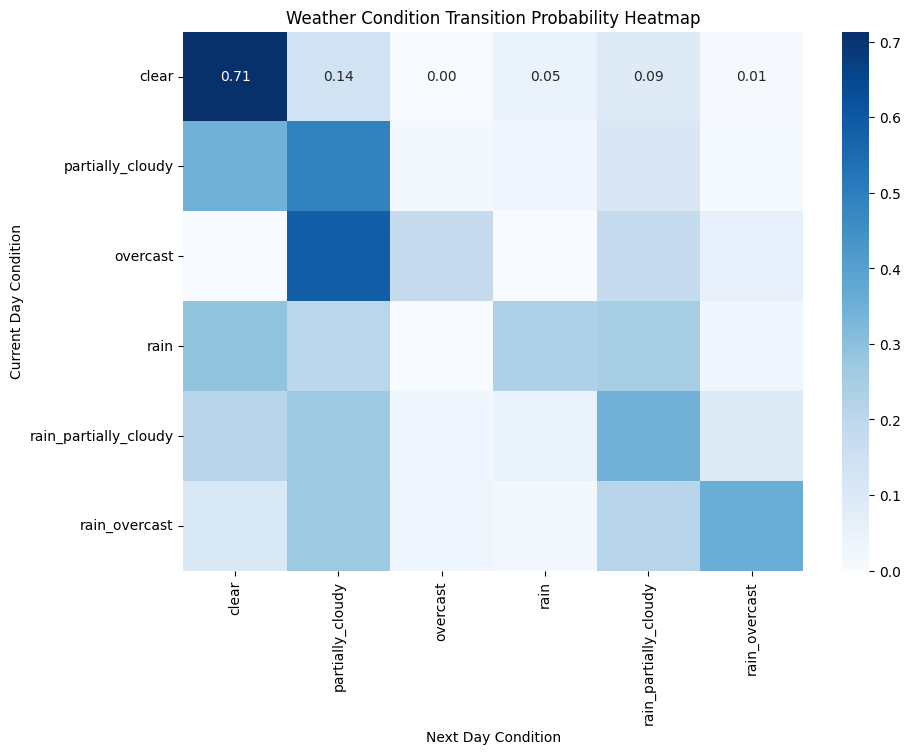

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Build transition matrix
states = ['clear', 'partially_cloudy', 'overcast', 'rain', 'rain_partially_cloudy', 'rain_overcast']
matrix = [
    [C_after_C_prob, PC_after_C_prob, OV_after_C_prob, R_after_C_prob, RPC_after_C_prob, ROV_after_C_prob],
    [C_after_PC_prob, PC_after_PC_prob, OV_after_PC_prob, R_after_PC_prob, RPC_after_PC_prob, ROV_after_PC_prob],
    [C_after_OV_prob, PC_after_OV_prob, OV_after_OV_prob, R_after_OV_prob, RPC_after_OV_prob, ROV_after_OV_prob],
    [C_after_R_prob, PC_after_R_prob, OV_after_R_prob, R_after_R_prob, RPC_after_R_prob, ROV_after_R_prob],
    [C_after_RPC_prob, PC_after_RPC_prob, OV_after_RPC_prob, R_after_RPC_prob, RPC_after_RPC_prob, ROV_after_RPC_prob],
    [C_after_ROV_prob, PC_after_ROV_prob, OV_after_ROV_prob, R_after_ROV_prob, RPC_after_ROV_prob, ROV_after_ROV_prob]
]

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='Blues', xticklabels=states, yticklabels=states)
plt.title("Weather Condition Transition Probability Heatmap")
plt.xlabel("Next Day Condition")
plt.ylabel("Current Day Condition")
plt.show()


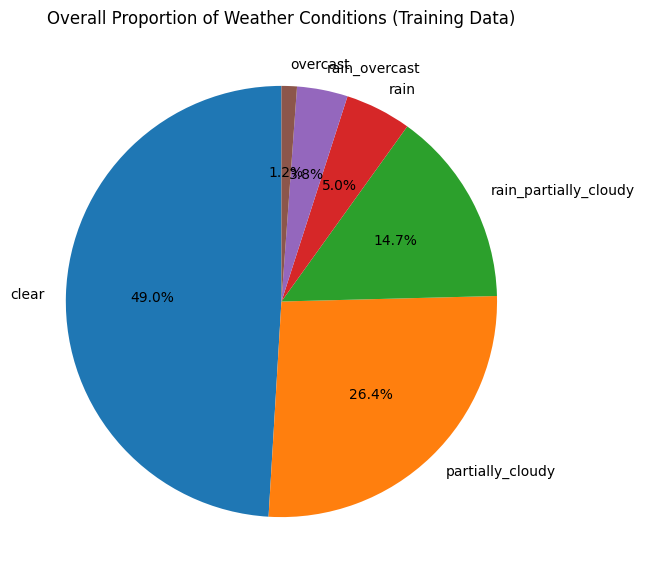

In [124]:
fall_train['condition'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7, 7), startangle=90)
plt.title("Overall Proportion of Weather Conditions (Training Data)")
plt.ylabel('')
plt.show()


C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_17824\3201754098.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



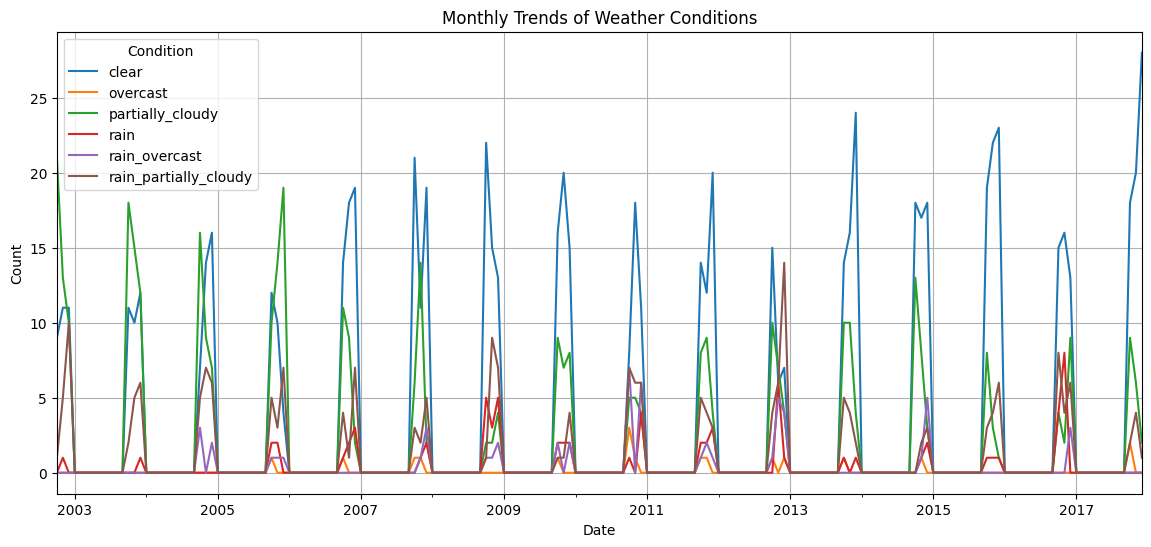

In [125]:
fall_train['datetime'] = pd.to_datetime(fall_train['datetime'])
fall_train.set_index('datetime', inplace=True)

# Resample monthly and count
monthly_counts = fall_train.groupby('condition').resample('M').size().unstack(0).fillna(0)

monthly_counts.plot(figsize=(14, 6))
plt.title("Monthly Trends of Weather Conditions")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(title='Condition')
plt.grid(True)
plt.show()


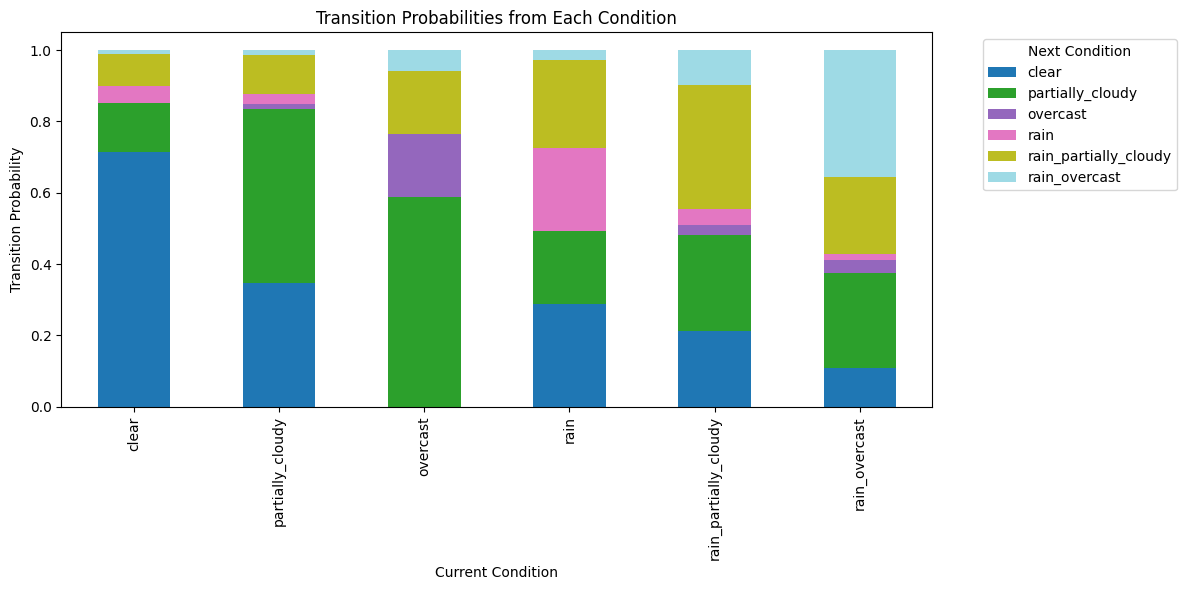

In [126]:
transition_df = pd.DataFrame(matrix, columns=states, index=states)
transition_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Transition Probabilities from Each Condition")
plt.xlabel("Current Condition")
plt.ylabel("Transition Probability")
plt.legend(title='Next Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [127]:
import plotly.graph_objects as go

labels = states
source = []
target = []
value = []

for i, row in enumerate(matrix):
    for j, val in enumerate(row):
        if val > 0:
            source.append(i)
            target.append(j)
            value.append(val)

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="Weather Condition Transitions (Sankey Diagram)", font_size=10)
fig.show()


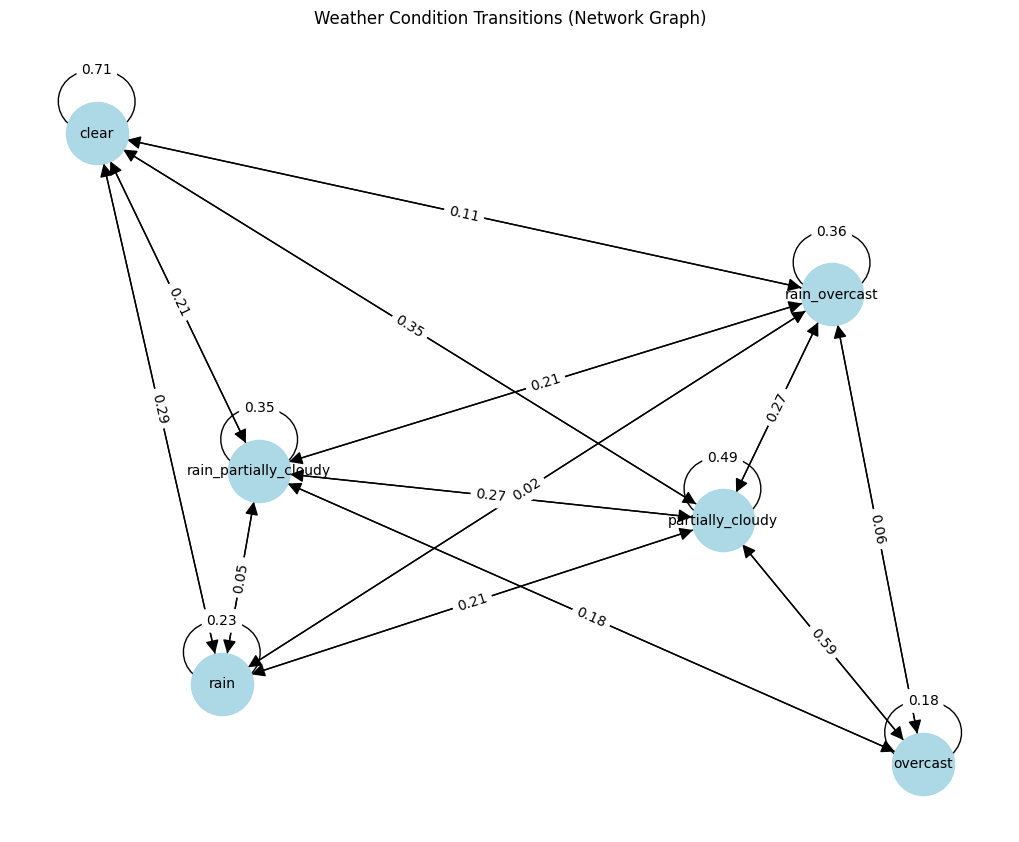

In [128]:
import networkx as nx

G = nx.DiGraph()

# Add weighted edges
for i, row in enumerate(matrix):
    for j, val in enumerate(row):
        if val > 0:
            G.add_edge(states[i], states[j], weight=val)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrowsize=20)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
plt.title("Weather Condition Transitions (Network Graph)")
plt.show()
